In [1]:
import numpy as np
import if2 as if2
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# FX_spot = 4.50 # EUR/PLN

# stopy depozytowe w EUR dla tenorów 1W, 1M, 3M, 6M, 9M, 1Y
# tydzień = 7/360, miesiąc = 30/360, kwartał = 90/360, pół roku = 180/360, 9 miesięcy = 270/360, rok = 360/360
# punkty swapowe
# 30, 50, 70, 150, 250, 350 - w pipsach

# FX_forward = FX_spot + punkty swapowe

# F(T) = ( 1 + stopa dla PLN * procent roku ) / ( 1 + stopa dla EUR * procent roku ) * S
# L PLN (T) = DF_EUR(T) / DF_PLN(T) * S
# np 5 % ACT/360 to 5/100 * 360/360 = 5/100

In [3]:
fx_spot = 4.50

tenor = np.array(["1W", "1M", "3M", "6M", "9M", "1Y"])
days = np.array([7, 31 , 92, 183, 273, 365])
r_ccy = np.array([0.03, 0.031, 0.033, 0.035, 0.04, 0.042])
swapp = np.array([13.0700, 65.5900, 201.5000, 433.1100, 705.2300, 1028.2000])

ccy_basis = 360
pln_basis = 365

In [4]:
curves = if2.cc_imp_curves2(fx_spot, tenor, days, r_ccy, ccy_basis, pln_basis, swapp)

curves1 = pd.DataFrame(
    curves,
    index=[
        "tenor",
        "yf_ccy",
        "df_ccy",
        "rate_ccy",
        "yf_pln",
        "df_pln",
        "rate_pln",
    ],
)
curves2 = curves1.T

In [5]:
t = 31 / 365
df_t = if2.int_df(t, curves2["yf_ccy"], curves2['df_ccy'])
-np.log(df_t) / t

0.030954778055894572

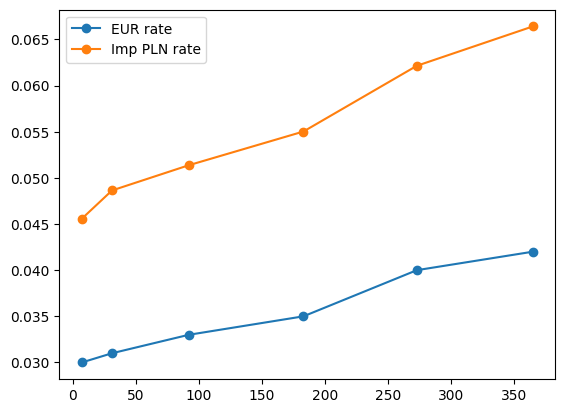

In [6]:
plt.plot(days, curves2["rate_ccy"], "o-", label="EUR rate")
plt.plot(days, curves2['rate_pln'], "o-", label="Imp PLN rate")

plt.legend()

In [7]:
tenor = 0.25
df_ccy_t = if2.int_df(tenor, curves2['yf_ccy'], curves2['df_ccy'])
df_pln_t = if2.int_df(tenor, curves2["yf_pln"], curves2["df_pln"])
omega = 1
tau = 92 / 365
sigma = 0.2
fx_spot = 4.50
strike = 4.50
val1 = if2.BS_value(fx_spot, df_ccy_t, df_pln_t, tau, sigma, omega, tenor, strike, 1)
val1, df_pln_t, df_ccy_t

(0.18861534561076132, 0.9873227881608155, 0.9918235760056807)

In [8]:
fx_range = np.linspace(3, 6, 1000)

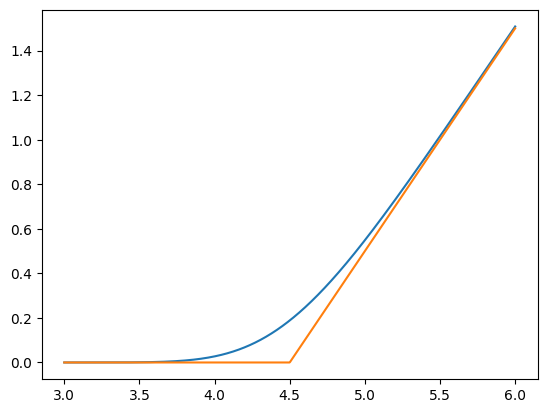

In [12]:
plt.plot(
    fx_range,
    if2.BS_value(fx_range, df_ccy_t, df_pln_t, tau, sigma, omega, tenor, strike, 1),
)
plt.plot(fx_range, if2.BS_payout(omega, strike, 1, fx_range))

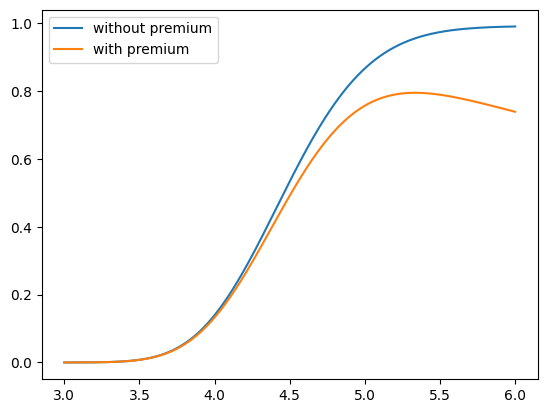

In [ ]:
plt.plot(
    fx_range,
    if2.BS_delta(
        fx_range, df_ccy_t, df_pln_t, tau, sigma, omega, tenor, strike, 1, is_spot=True, with_premium=False
    ),
    label="without premium"
)
plt.plot(
    fx_range,
    if2.BS_delta(
        fx_range,
        df_ccy_t,
        df_pln_t,
        tau,
        sigma,
        omega,
        tenor,
        strike,
        1,
        is_spot=True,
        with_premium=True,
    ),
    label="with premium",
)
plt.legend()
plt.show()

In [ ]:
# dla zadanej wartości delty o określonym typie i zmienności wyznacza cenę wykonania
delta = 0.5
fx_spot = 4.5
df_ccy_t = df_ccy_t 
df_pln_t = df_pln_t
tau = 0.25
sigma = 0.20
omega = 1
tenor = np.inf
is_spot=True
with_premium=True
strike = if2.BS_strike_from_delta(
    delta,
    fx_spot,
    df_ccy_t,
    df_pln_t,
    tau,
    sigma,
    omega,
    tenor,
    is_spot,
    with_premium,
)
print(strike)

4.489400728558148


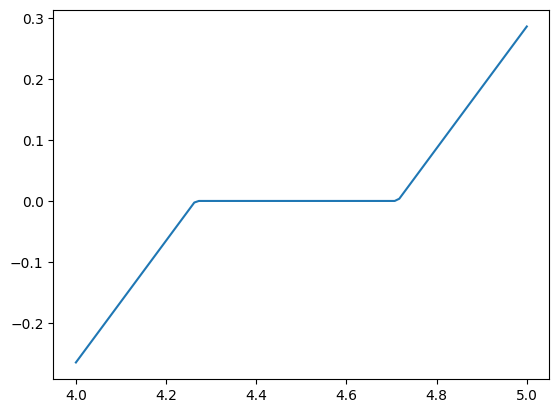

In [11]:
values = []

for fx_spot in np.linspace(4, 5, 100):
    RR = [
        {
            "position": "SELL",
            "type": "PUT",
            "nominal": 1,
            "strike": 4.265203203406555,
        },
        {
            "position": "BUY",
            "type": "CALL",
            "strike": 4.713539517708248,
            "nominal": 1,
        },
    ]

    values.append(if2.evaluate_strategy(RR, fx_spot))

plt.plot(np.linspace(4, 5, 100), values)

In [10]:
import if2

s_atm = 0.12
s_rr = -0.05
s_bf = 0.03
tenor = 0.25
delta = 0.25
fx_spot = 4.5

s_25c = s_atm + s_rr / 2 + s_bf
s_25p = s_atm - s_rr / 2 + s_bf

is_spot = True
with_premium = True

k_25c = if2.BS_strike_from_delta(
    delta, 
    fx_spot,
    df_ccy_t,
    df_pln_t,
    tenor,
    s_25c,
    1,
    tenor,
    is_spot,
    with_premium,
)
k_25p = if2.BS_strike_from_delta(
    -delta,
    fx_spot,
    df_ccy_t,
    df_pln_t,
    tenor,
    s_25p,
    -1,
    tenor,
    is_spot,
    with_premium,
)
print(s_25c, s_25p)
k_25c, k_25p

0.125 0.175


(4.713539517708248, 4.265203203406555)